### **BARK TEXTURE RECOGNITION SYSTEM**
```

**This notebook is trained only on eight bark textures. Due to lack of time and
GPU resources, as the deadline email was found in spam, i couldn't start the work soon so i decided to use transfer learning using Imagenet algorithms namely VGG16 and Exception to train bark texture data.**

# **1. Importing Libraries**

**Dataset has been downloaded from Kaggle and uploaded on my drive to enable use in Collab easily.**

1.   Tensorflow, pytorch, sklearn, opencv and various image processing libraries
2.  Numpy, pandas, matpltlib, seaborn and various inbuild python libraries



In [118]:
#IMPORTING LIBRARIES
import random
import torch
import cv2
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as Acivation
from sklearn.model_selection import train_test_split

#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

#IMAGE PROCESS
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import seaborn as sns
import pandas as pd

#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

#Model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, Input, Activation
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%matplotlib inline

#**2. Data Download from Drive** 

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
path = '/content/drive/MyDrive/BarkVN-50_mendeley/'

In [68]:
CATEGORIES = ['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', 'Annona squamosa', 'Artocarpus altilis', 'Artocarpus heterophyllus', 'Barringtonia acutangula']

## **2.1 Bark Textures Imges Uploading & Labeling**

In [69]:
folder_name = ['Acacia']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_1=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_1.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_1))

# set Acacia image label
bark_data_path_1_label = list()
for i in range(len(bark_data_path_1)):
    bark_data_path_1_label.append('Acacia')

print(bark_data_path_1_label[:1])
len(bark_data_path_1_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Acacia
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Acacia :102
102
['Acacia']


102

In [70]:
folder_name = ['Adenanthera microsperma']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_2=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_2.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_2))

# set Adenanthera microsperma image label
bark_data_path_2_label = list()
for i in range(len(bark_data_path_2)):
    bark_data_path_2_label.append('Adenanthera microsperma')

print(bark_data_path_2_label[:1])
len(bark_data_path_2_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Adenanthera microsperma
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Adenanthera microsperma :80
80
['Adenanthera microsperma']


80

In [71]:
folder_name = ['Adenium species']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_3=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_3.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_3))


# set Adenium species image label
bark_data_path_3_label = list()
for i in range(len(bark_data_path_3)):
    bark_data_path_3_label.append('Adenium species')

print(bark_data_path_3_label[:1])
len(bark_data_path_3_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Adenium species
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Adenium species :144
144
['Adenium species']


144

In [72]:
folder_name = ['Anacardium occidentale']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_4=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_4.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_4))


# set Anacardium occidentale species image label
bark_data_path_4_label = list()
for i in range(len(bark_data_path_4)):
    bark_data_path_4_label.append('Anacardium occidentale')

print(bark_data_path_4_label[:1])
len(bark_data_path_4_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Anacardium occidentale
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Anacardium occidentale :239
239
['Anacardium occidentale']


239

In [73]:
folder_name = ['Annona squamosa']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_5=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_5.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_5))


# set Annona squamosa image label
bark_data_path_5_label = list()
for i in range(len(bark_data_path_5)):
    bark_data_path_5_label.append('Annona squamosa')

print(bark_data_path_5_label[:1])
len(bark_data_path_5_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Annona squamosa
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Annona squamosa :105
105
['Annona squamosa']


105

In [74]:
folder_name = ['Artocarpus altilis']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_6=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_6.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_6))


# setArtocarpus altilis image label
bark_data_path_6_label = list()
for i in range(len(bark_data_path_6)):
    bark_data_path_6_label.append('Artocarpus altilis')

print(bark_data_path_6_label[:1])
len(bark_data_path_6_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Artocarpus altilis
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Artocarpus altilis :104
104
['Artocarpus altilis']


104

In [75]:
folder_name = ['Artocarpus heterophyllus']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_7=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                       
                bark_data_path_7.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_7))



# set Artocarpus heterophyllus image label
bark_data_path_7_label = list()
for i in range(len(bark_data_path_7)):
    bark_data_path_7_label.append('Artocarpus heterophyllus')

print(bark_data_path_7_label[:1])
len(bark_data_path_7_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Artocarpus heterophyllus
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Artocarpus heterophyllus :138
138
['Artocarpus heterophyllus']


138

In [76]:
folder_name = ['Barringtonia acutangula']
dataset_path = '/content/drive/MyDrive/BarkVN-50_mendeley'


bark_data_path_8=[]
for category in folder_name:
        path=os.path.join(dataset_path, category)
        print(path)
        
        total = 0
        for img_file in os.listdir(path):
            # print(img_file)
            try:
                img=cv2.imread(os.path.join(path,img_file),1)
                        
                bark_data_path_8.append(os.path.join(path,img_file))
                total += 1
            except:
                print("Exception: ",img_file)
                pass
        print("total image in path "+path+ " :"+str(total))

print(len(bark_data_path_8))



# set Barringtonia acutangula image label
bark_data_path_8_label = list()
for i in range(len(bark_data_path_8)):
    bark_data_path_8_label.append('Barringtonia acutangula')

print(bark_data_path_8_label[:1])
len(bark_data_path_8_label)

/content/drive/MyDrive/BarkVN-50_mendeley/Barringtonia acutangula
total image in path /content/drive/MyDrive/BarkVN-50_mendeley/Barringtonia acutangula :102
102
['Barringtonia acutangula']


102

## **2.2 Image Aggregation Step for Dataframe conversion**

In [78]:
# Aggregate all image(rust) and thier label
all_data_path = list()
all_data_path.extend(bark_data_path_1)
all_data_path.extend(bark_data_path_2)
all_data_path.extend(bark_data_path_3)
all_data_path.extend(bark_data_path_4)
all_data_path.extend(bark_data_path_5)
all_data_path.extend(bark_data_path_6)
all_data_path.extend(bark_data_path_7)
all_data_path.extend(bark_data_path_8)


# print(all_data_path[:8])
# len(all_data_path)


all_data_path_label = list()
all_data_path_label.extend(bark_data_path_1_label)
all_data_path_label.extend(bark_data_path_2_label)
all_data_path_label.extend(bark_data_path_3_label)
all_data_path_label.extend(bark_data_path_4_label)
all_data_path_label.extend(bark_data_path_5_label)
all_data_path_label.extend(bark_data_path_6_label)
all_data_path_label.extend(bark_data_path_7_label)
all_data_path_label.extend(bark_data_path_8_label)


# print(all_data_path_label[:8])
# len(all_data_path_label)


print(len(all_data_path), len(all_data_path_label))

1014 1014


In [79]:
# TRANSFORMATION TO SERIES STRUCTURE
Path_Series = pd.Series(all_data_path,name="IMG").astype(str)
Labels_Series = pd.Series(all_data_path_label,name="CATEGORY")

In [80]:
# TRANSFORMATION TO DATAFRAME STRUCTURE
data_df = pd.concat([Path_Series,Labels_Series],axis=1)
print(data_df)

                                                    IMG  \
0     /content/drive/MyDrive/BarkVN-50_mendeley/Acac...   
1     /content/drive/MyDrive/BarkVN-50_mendeley/Acac...   
2     /content/drive/MyDrive/BarkVN-50_mendeley/Acac...   
3     /content/drive/MyDrive/BarkVN-50_mendeley/Acac...   
4     /content/drive/MyDrive/BarkVN-50_mendeley/Acac...   
...                                                 ...   
1009  /content/drive/MyDrive/BarkVN-50_mendeley/Barr...   
1010  /content/drive/MyDrive/BarkVN-50_mendeley/Barr...   
1011  /content/drive/MyDrive/BarkVN-50_mendeley/Barr...   
1012  /content/drive/MyDrive/BarkVN-50_mendeley/Barr...   
1013  /content/drive/MyDrive/BarkVN-50_mendeley/Barr...   

                     CATEGORY  
0                      Acacia  
1                      Acacia  
2                      Acacia  
3                      Acacia  
4                      Acacia  
...                       ...  
1009  Barringtonia acutangula  
1010  Barringtonia acutangula  
101

In [81]:
#shuffle
data_df = data_df.sample(frac=1).reset_index(drop=True)
print(data_df)

                                                    IMG  \
0     /content/drive/MyDrive/BarkVN-50_mendeley/Aden...   
1     /content/drive/MyDrive/BarkVN-50_mendeley/Aden...   
2     /content/drive/MyDrive/BarkVN-50_mendeley/Anac...   
3     /content/drive/MyDrive/BarkVN-50_mendeley/Anno...   
4     /content/drive/MyDrive/BarkVN-50_mendeley/Anac...   
...                                                 ...   
1009  /content/drive/MyDrive/BarkVN-50_mendeley/Anac...   
1010  /content/drive/MyDrive/BarkVN-50_mendeley/Arto...   
1011  /content/drive/MyDrive/BarkVN-50_mendeley/Acac...   
1012  /content/drive/MyDrive/BarkVN-50_mendeley/Arto...   
1013  /content/drive/MyDrive/BarkVN-50_mendeley/Arto...   

                      CATEGORY  
0              Adenium species  
1      Adenanthera microsperma  
2       Anacardium occidentale  
3              Annona squamosa  
4       Anacardium occidentale  
...                        ...  
1009    Anacardium occidentale  
1010  Artocarpus heterophyl

## **2.3 Class Distribution Plot**

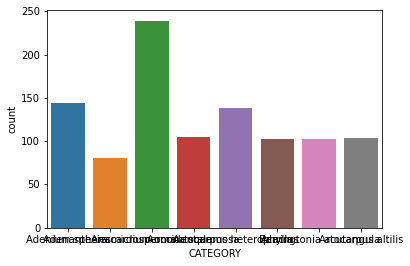

In [82]:
sns.countplot(data_df["CATEGORY"])
plt.show()

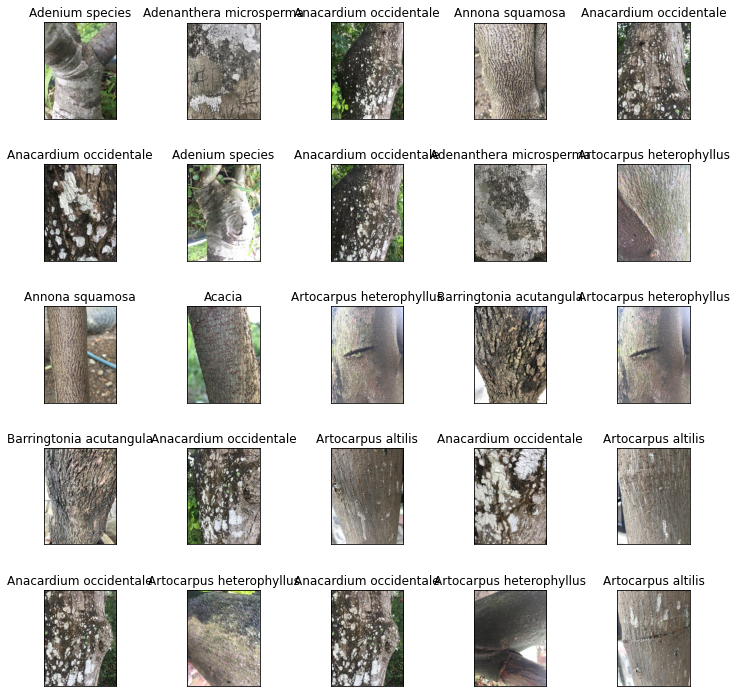

In [83]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    img = cv2.imread(data_df["IMG"][i])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(data_df["CATEGORY"][i])
plt.tight_layout()
plt.show()

# **3. Test/Train Split**
80% training set while 20% testing set

In [84]:
Train_Data,Test_Data = train_test_split(data_df,train_size=0.8,random_state=42,shuffle=True)

In [85]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (811, 2)
TEST SHAPE:  (203, 2)


In [86]:
Train_Data

,IMG,CATEGORY
847,/content/drive/MyDrive/BarkVN-50_mendeley/Arto...,Artocarpus altilis
332,/content/drive/MyDrive/BarkVN-50_mendeley/Aden...,Adenium species
707,/content/drive/MyDrive/BarkVN-50_mendeley/Arto...,Artocarpus altilis
218,/content/drive/MyDrive/BarkVN-50_mendeley/Anac...,Anacardium occidentale
425,/content/drive/MyDrive/BarkVN-50_mendeley/Acac...,Acacia
...,...,...
106,/content/drive/MyDrive/BarkVN-50_mendeley/Arto...,Artocarpus altilis
270,/content/drive/MyDrive/BarkVN-50_mendeley/Aden...,Adenanthera microsperma
860,/content/drive/MyDrive/BarkVN-50_mendeley/Anno...,Annona squamosa
435,/content/drive/MyDrive/BarkVN-50_mendeley/Anac...,Anacardium occidentale


## **3.1 Image preprocessing**


**In this step, we are defining the dimensions of the image. We found that 224, 224 with 3 RGB units works best.**

In [89]:
#Data Generator for training samples

Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="IMG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   target_size=(224, 224),
                                                   subset="training")

#Data Generator for validation and testing samples

Validation_Generator = ImageDataGenerator(rescale=1./255)

Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="IMG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   subset="validation")

Test_Generator = ImageDataGenerator(rescale=1./255)

Test_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                   x_col="IMG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   target_size=(224, 224),
                                                   batch_size=100)

Found 730 validated image filenames belonging to 8 classes.
Found 81 validated image filenames belonging to 8 classes.
Found 203 validated image filenames belonging to 8 classes.


**The categorical values are labeled into numeric values by assigning each category to a number in case of Label encoding. Here we are encoding lables.**

In [87]:
encode = LabelEncoder()
test_encode_label = encode.fit_transform(Test_Data["CATEGORY"])

**Since my dataset is not big enough, I can increase it by applying random transformations to the images such as rotation, augmentation, and some distortion.**

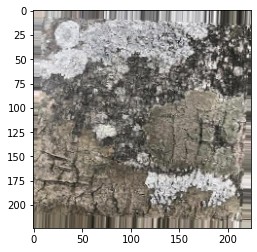

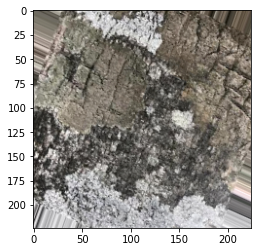

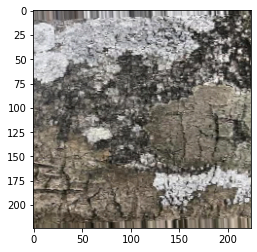

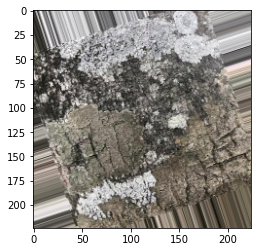

In [88]:
# After Augmentation by datageneratior
example_Image = Train_Data["IMG"][1]
Load_Image = image.load_img(example_Image,target_size=(224,224))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
   
    i += 1
    if i % 4 == 0:
        break
plt.show()

# **4. Model Architecture**
I am defining base model for transfer learning where I am using Sequential model inwhich, you stack up multiple same/or different layers where one's output goes into another ahead.
Dense" refers to the types of neurons and connections used in that particular layer or a layer with Dropout (same neurons, but different connectivity compared to Dense).
Unlike standard LSTM, the input flows in both directions in Bidirectional LSTM, and it's capable of utilizing information from both sides.

In [105]:
def build_model(cnn_model):
  

  model = Sequential()

  base_model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)
  
  model.add(base_model)

  #######################################################
  model.add(TimeDistributed(Flatten()))
  model.add(Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)))
  model.add(Bidirectional(GRU(32, return_sequences=True,  dropout=0.5, recurrent_dropout=0.5)))
  #######################################################

  model.add(Flatten())
  model.add(Dense(256,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(8,activation="softmax"))
  
  
  return model

**As we have defined our model, we are utilizing hyperparameters that are required to train the model and then finally, we will compile our model.**
Categorical crossentropy is a loss function that is used in multi-class classification tasks.Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. 

In [106]:
def train_model(pretrained_model, freezing=True, num_epoch=1, optimizer_name ='adam'):

  # layer freezing i.e that the layer weights of the trained model do not change
  if freezing == False:
    for layer in pretrained_model.layers:
        layer.trainable = True   # layer unfrozen
  else:
    for layer in pretrained_model.layers:
      layer.trainable = False   # layer frozen


  # create model
  model = build_model(cnn_model = pretrained_model)

  print(model.summary())

  # train the model
  model.compile(optimizer = optimizer_name , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  
  callback_monitoring = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5, mode="min")  # early stopping
  
  model_history = model.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=callback_monitoring,
                          epochs=num_epoch)
  
  return model, model_history

## **4.1 Model Performance Measurement**
How bad our model is doing is doing. This shows our model performance of training the data and then validating it. An epoch is how many times the model trains on our whole data set. Batch can be explained as taking in small amounts, train and take some more. Each epoch must finish all batch before moving to the next epoch. Training with too little epoch can lead to underfitting the data and too many will lead to overfitting the data. You also want a loss that is as low as possible.

In [107]:
def plot_acc_loss_curve(model_hist):
  
  plt.plot(model_hist.history["accuracy"], label="acc")
  plt.plot(model_hist.history["val_accuracy"], label='val_acc')
  plt.ylabel("ACCURACY")
  plt.xlabel("EPOCH")
  plt.legend(loc='lower right')
  plt.ylim(0.5,1)
  plt.show()

  print('\n')

  plt.plot(model_hist.history["loss"], label='loss')
  plt.plot(model_hist.history["val_loss"], label='val_loss')
  plt.ylabel("LOSS")
  plt.xlabel("EPOCH")
  plt.legend(loc='lower right')
  plt.ylim(0,1)
  plt.show()

**Performance evaluation on test data using CM. A confusion matrix shows where the model is getting confused, i.e. which classes the model predicts correctly and which classes the model predicts incorrectly.**

In [108]:
def model_performance(model, data):

  test_batch, test_label = None, None
  for data_batch,label_batch in data:

      test_batch = data_batch
      test_label = label_batch
      print("DATA SHAPE: ",data_batch.shape)
      print("LABEL SHAPE: ",label_batch.shape)
      break

  predict = model.predict(test_batch)
  y_pred = predict.argmax(axis=-1)
  y_test = test_label.argmax(axis=-1)


  print("\n\n\n confusion_matrix")
  # Creates a confusion matrix
  cm = confusion_matrix(y_test, y_pred) 

  # Transform to df for easier plotting
  cm_df = pd.DataFrame(cm,
                      index = CATEGORIES, 
                      columns = CATEGORIES)

  plt.figure(figsize=(5.5,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  # plt.savefig('cm.png')
  plt.show()


  print("\n\n\n classification_report")
  print(classification_report(y_test, y_pred))

# **5.1 VGG 16**
**Very Deep Convolutional Neural Networks for Large-Scale Image Recognition’. The name of this model was inspired by the name of their research group ‘Visual Geometry Group (VGG)’. As this convolutional neural network has 16 layers in its architecture, it was named VGG-16.**
Here, Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. Where Conv2d takes a 2-D image array as input and provides a tensor of outputs.

In [109]:
# load model and print summary
from tensorflow.keras.applications import VGG16

vgg_base_model = VGG16(include_top=False, input_shape=(224, 224, 3))   #include_top is false as we have to leiminate VGG16 output layer and insert ours.
vgg_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.**
Instead of having many hyper-parameters, VGG16 uses 3x3 convolution layers with stride 1 and 2x2 padding and maxpool layers with stride 2.

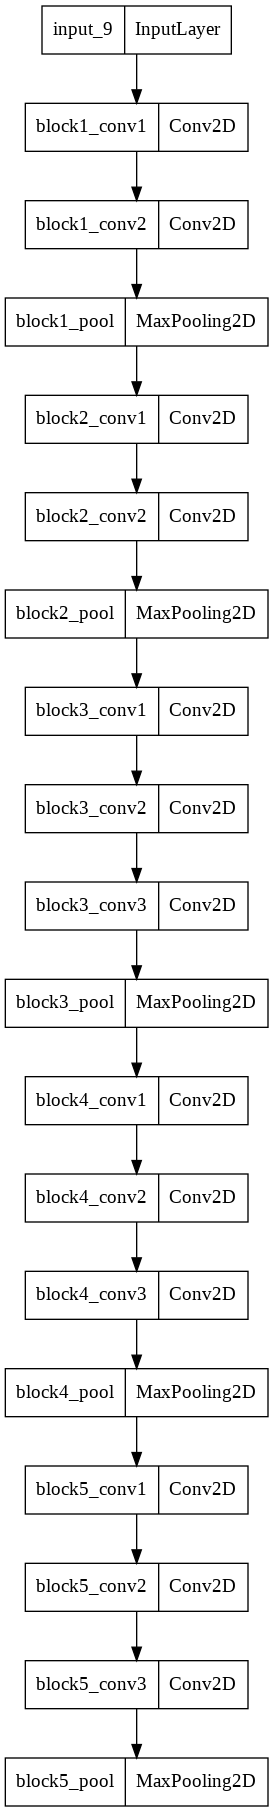

In [110]:
from tensorflow.keras.utils import plot_model
plot_model(vgg_base_model, to_file='model.png')

In [111]:
# load model and setting the optimizer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

vgg_base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
opt = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0.0)

vgg_model, vgg_model_history_1 = train_model(pretrained_model=vgg_base_model, freezing=True, num_epoch=100, optimizer_name = opt)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_4 (Functional)        (None, 7, 7, 512)         14714688  
                                                                 
 time_distributed_4 (TimeDis  (None, 7, 3584)          0         
 tributed)                                                       
                                                                 
 bidirectional_8 (Bidirectio  (None, 7, 64)            925952    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 7, 64)            18816     
 nal)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 448)               0         
                                                      

**The model stopped after 36 epochs to avoid overfitting. It attained an accuracy of 94%** 

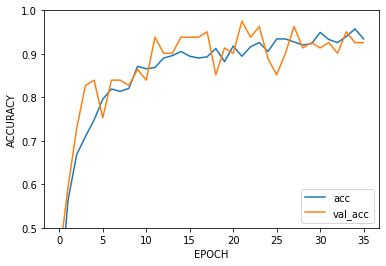

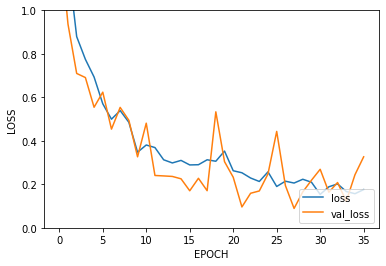

DATA SHAPE:  (100, 224, 224, 3)
LABEL SHAPE:  (100, 8)



 confusion_matrix


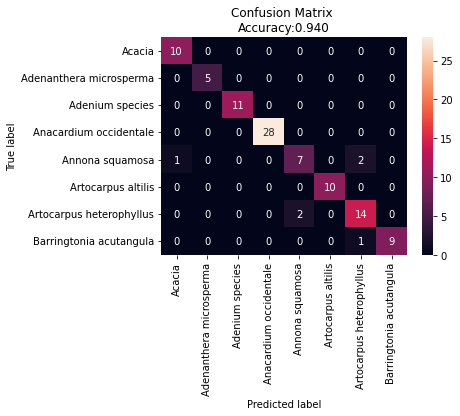




 classification_report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        28
           4       0.78      0.70      0.74        10
           5       1.00      1.00      1.00        10
           6       0.82      0.88      0.85        16
           7       1.00      0.90      0.95        10

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100



In [112]:
plot_acc_loss_curve(model_hist = vgg_model_history_1)
model_performance(model = vgg_model, data = Test_IMG_Set)

**Saving the model in drive to upload in a flask app or streamlit app in H5 format**

In [113]:
vgg_model.save('/content/drive/MyDrive/barkmodels/vgg_model.h5')

# **5.2 XCEPTION**
**This model is number one for accuracy, but not the best if you need to maximize performance. It was developed by Google and is characterized by having an entry flow, middle flow, and exit flow.**
The model has various arguments, however, we do not need to set them all. The data first goes through the entry flow, then through the middle flow which is repeated eight times, and finally through the exit flow. Note that all Convolution and Separable Convolution layers are followed by batch normalization. Xception stands for “extreme inception”, it takes the principles of Inception to an extreme.

In [114]:
# load model and print summary
from keras.applications.xception import Xception, preprocess_input

xception_base_model = Xception(include_top=False, input_shape=(299, 299, 3))
xception_base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [115]:
# load model and setting the optimizer
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adam

xception_base_model = Xception(include_top=False, input_shape=(224, 224, 3))
opt = Adam(learning_rate=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0.0)

xception_model, xception_model_history_1 = train_model(pretrained_model=xception_base_model, freezing=True, num_epoch=100, optimizer_name = opt)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_5 (Functional)        (None, 7, 7, 2048)        20861480  
                                                                 
 time_distributed_5 (TimeDis  (None, 7, 14336)         0         
 tributed)                                                       
                                                                 
 bidirectional_10 (Bidirecti  (None, 7, 64)            3678464   
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 7, 64)            18816     
 onal)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 448)               0         
                                                      

**The plots below show the accuracy and loss of our data set and we have achieved maximum accuracy of  95% with current hyperparameters and learning rate.**

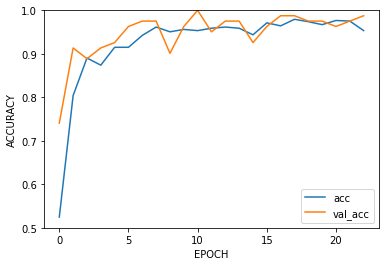

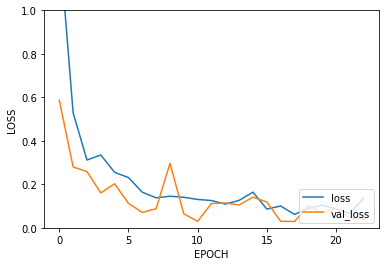

DATA SHAPE:  (100, 224, 224, 3)
LABEL SHAPE:  (100, 8)



 confusion_matrix


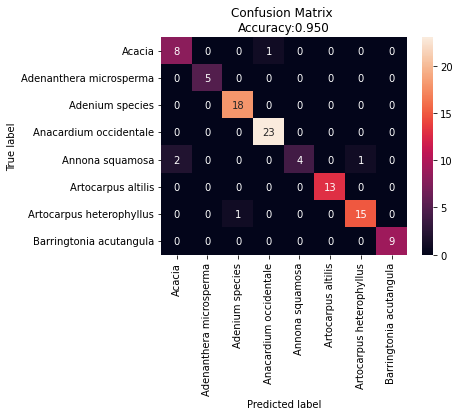




 classification_report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       1.00      1.00      1.00         5
           2       0.95      1.00      0.97        18
           3       0.96      1.00      0.98        23
           4       1.00      0.57      0.73         7
           5       1.00      1.00      1.00        13
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00         9

    accuracy                           0.95       100
   macro avg       0.96      0.92      0.93       100
weighted avg       0.95      0.95      0.95       100



In [116]:
plot_acc_loss_curve(model_hist = xception_model_history_1)
model_performance(model = xception_model, data = Test_IMG_Set)

In [117]:
xception_model.save('/content/drive/MyDrive/barkmodels/exception_model.h5')

#                                  **END**